# Machine Learning Project<br/>Predict whether the house can be sold<br/>

## A. Steps of solving Business Problem with Machine Learning

1. Business Understand
2. Machine Learning Task
3. Data
4. Modeling & Training
5. Evaluation
6. Parameter Tuning
7. Prediction
8. Business Problem Conclusion

### 1. Business understand

<br/>
<li><b>What is the current problem?</b></li>
ANS: <br/><br/>
<li><b>What outcome want to achieve?</b></li>
ANS: Predict the house can be sold or not.

### 2. Machine Learning Task

What Machine Learning technique shoud solve the problem?<br/><br/>
<li>Can we achieve the above outcome without Machine Learning technique?</li>
<li>Supervisor or Un-Supervisor Learning?</li>
<li>Classification or Regression?</li><br/>

This is to judge whether it can be sold, so we use the <b>Supervisor Learning</b> ~ <b>Classification</b>.

### 3. Data

Data is the most critical part of the entire machine learning. So you need to consider the following:<br/><br/>
<li>Do I have the data?</li>
<li>Where does the data come from?</li>
<li>Do we trust the data source?</li>
<li>Do I have the domain knowledge?</li>

The data is coming from the <a href="https://www.udemy.com/course/machine-learning-basics-classification-models-in-python/learn/lecture/14519188?start=0#overview">udemy online course </a>

### 4. Modeling & Training
Follow the task defined in step 2. We should choose the appropriate machine learning model and train the model to solve the task<br/><br/>
<li>Is there a pre-trained model?</li>
<li>Is anyone else doing similar work as a reference?</li>
<li>Can you fully understand the features in the data?</li>
<li>Do I need to use additional hardware? For example: GPU</li><br/>

There are a lot of ML model can get the job done. In this case i will use Logistic Regression to slove the problem.

### 5. Evaluation

After the training is completed, we need to check whether the performance of the model meets our expectations. Therefore, we evaluate the model. Make sure the way to prepare the train/test data is correct.<br/>

Classification:
<li>AUC</li>
<li>Confusion Matrix</li>
<li>F1 Score/Precision/Recall</li>

Regression:
<li>MAE</li>
<li>MSE</li>

### 6. Parameter Tuning

After completing the evaluation, we will obtain the benchmark results. We can adjust the parameters to improve the results. This step is always said to be hyperparameter turning.<br/><br/>

<li>Learing Rate</li>
<li>Kernel Size</li>
<li>Optimizer</li>
<li>Dropout</li>
<li>etc.</li>

### 7. Prediction

After completing the parameter tuning, it's time to test our model. The best model will be used for prediction.

### 8. Business Problem Conclusion

Finally, we can compare the results collected in the "prediction" step to see if this meets the business goals.

## Coding

In [43]:
### Import libraries
import pandas as pd
import numpy as np

import IPython
from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns

#Common Model Algorithms
from sklearn.linear_model import LogisticRegression

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix

In [44]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.0, size=15)

In [45]:
### Load Dataset
house_df = pd.read_csv('house.csv', header = 0)

print ("The dataset contain : " + str(house_df.shape[0]) + " rows and " + str(house_df.shape[1]) + " columns.")

The dataset contain : 506 rows and 19 columns.


In [46]:
house_df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [47]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
Sold           506 non-null int64
dtypes: float64(14), int64(2), object(3)
memory usage: 75.2+ KB


In [48]:
house_df.isnull().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
Sold           0
dtype: int64

In [49]:
house_df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


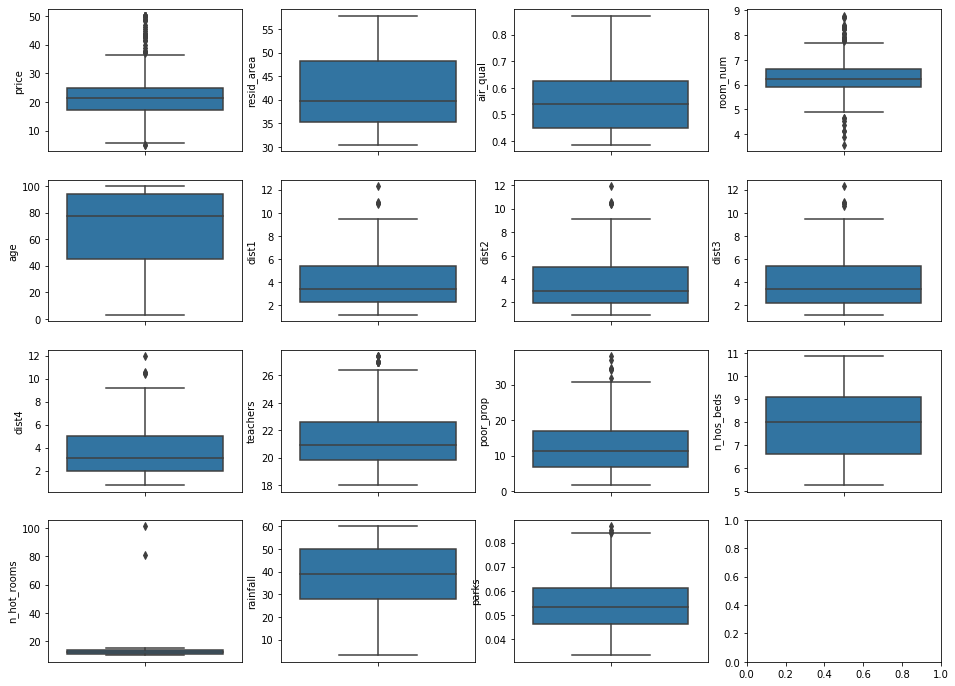

In [50]:
fig1, saxis = plt.subplots(4, 4, figsize=(16,12))
sns.boxplot(y='price', data=house_df, ax=saxis[0,0])
sns.boxplot(y='resid_area', data=house_df, ax=saxis[0,1])
sns.boxplot(y='air_qual', data=house_df, ax=saxis[0,2])
sns.boxplot(y='room_num', data=house_df, ax=saxis[0,3])

sns.boxplot(y='age', data=house_df, ax=saxis[1,0])
sns.boxplot(y='dist1', data=house_df, ax=saxis[1,1])
sns.boxplot(y='dist2', data=house_df, ax=saxis[1,2])
sns.boxplot(y='dist3', data=house_df, ax=saxis[1,3])

sns.boxplot(y='dist4', data=house_df, ax=saxis[2,0])
sns.boxplot(y='teachers', data=house_df, ax=saxis[2,1])
sns.boxplot(y='poor_prop', data=house_df, ax=saxis[2,2])
sns.boxplot(y='n_hos_beds', data=house_df, ax=saxis[2,3])

sns.boxplot(y='n_hot_rooms', data=house_df, ax=saxis[3,0])
sns.boxplot(y='rainfall', data=house_df, ax=saxis[3,1])
sns.boxplot(y='parks', data=house_df, ax=saxis[3,2])

fig1.show()

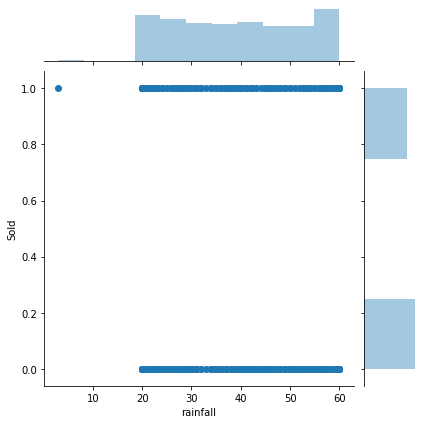

In [51]:
sns.jointplot(x='rainfall', y='Sold', data=house_df)

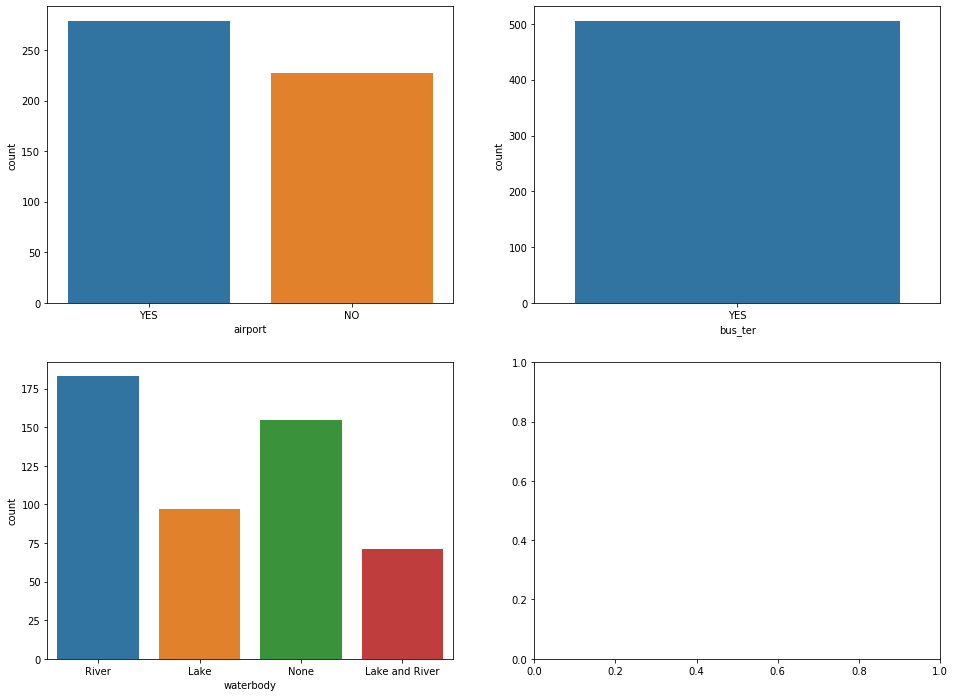

In [52]:
fig2, caxis = plt.subplots(2, 2, figsize=(16,12))
sns.countplot(x='airport', data=house_df, ax=caxis[0,0])
sns.countplot(x='bus_ter', data=house_df, ax=caxis[0,1])
sns.countplot(x='waterbody', data=house_df, ax=caxis[1,0])

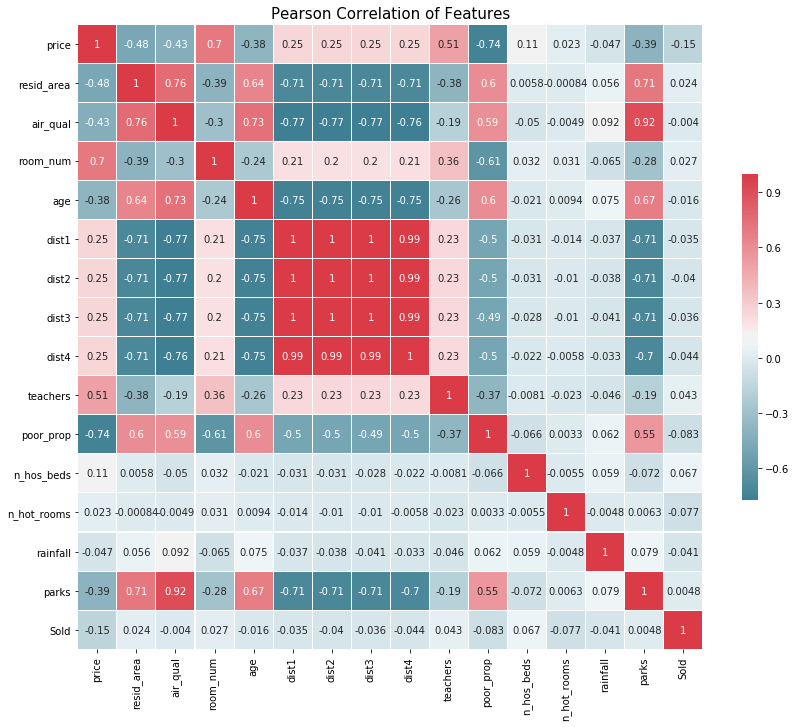

In [53]:
correlation_heatmap(house_df)

### Data Preprocessing
<br/>
<li> n_hos_beds </li>
<li> n_hot_rooms </li>
<li> rainfall </li>


In [54]:
house_df['n_hos_beds'] = house_df['n_hos_beds'].fillna(house_df['n_hos_beds'].mean())

In [55]:
n_hot_rooms_limit = np.percentile(house_df['n_hot_rooms'],[99])[0]
n_hot_rooms_limit

15.399519999999999

In [56]:
house_df[house_df['n_hot_rooms'] > n_hot_rooms_limit]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [57]:
house_df['n_hot_rooms'] = house_df['n_hot_rooms'].apply(lambda x : (3*n_hot_rooms_limit) if (x > (3*n_hot_rooms_limit)) else x)

In [58]:
rainfall_limit = np.percentile(house_df['rainfall'],[1])[0]
rainfall_limit

20.0

In [72]:
house_df[house_df['rainfall'] < rainfall_limit]

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,Lake,Lake and River,River
213,28.1,40.59,0.489,6.375,32.3,21.4,9.38,1,7.562,10.2248,6.0,0.044019,1,3.945,0,0,0


In [59]:
house_df['rainfall'] = house_df['rainfall'].apply(lambda x : (0.3*rainfall_limit) if (x < (0.3*rainfall_limit)) else x)

### Data Transformation

In [60]:
house_df = house_df.drop(['bus_ter'], axis=1)

In [61]:
house_df['avg_dist'] = house_df.apply(lambda x : (x['dist1'] + x['dist2'] + x['dist3'] + x['dist4'])/4,axis=1)

In [62]:
house_df = house_df.drop(['dist1','dist2','dist3','dist4'], axis=1)

In [63]:
house_df['airport'].unique()

array(['YES', 'NO'], dtype=object)

In [64]:
labelencoder = LabelEncoder()
house_df['airport'] = labelencoder.fit_transform(house_df['airport'])

In [65]:
house_df['waterbody'].unique()

array(['River', 'Lake', 'None', 'Lake and River'], dtype=object)

In [66]:
waterbody_one_hot = pd.get_dummies(house_df['waterbody'])
waterbody_one_hot.head()

,Lake,Lake and River,None,River
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


In [67]:
waterbody_one_hot = waterbody_one_hot.drop(['None'], axis=1)

In [68]:
house_df = house_df.join(waterbody_one_hot)
house_df = house_df.drop(['waterbody'], axis=1)

In [69]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
price             506 non-null float64
resid_area        506 non-null float64
air_qual          506 non-null float64
room_num          506 non-null float64
age               506 non-null float64
teachers          506 non-null float64
poor_prop         506 non-null float64
airport           506 non-null int64
n_hos_beds        506 non-null float64
n_hot_rooms       506 non-null float64
rainfall          506 non-null float64
parks             506 non-null float64
Sold              506 non-null int64
avg_dist          506 non-null float64
Lake              506 non-null uint8
Lake and River    506 non-null uint8
River             506 non-null uint8
dtypes: float64(12), int64(2), uint8(3)
memory usage: 57.0 KB


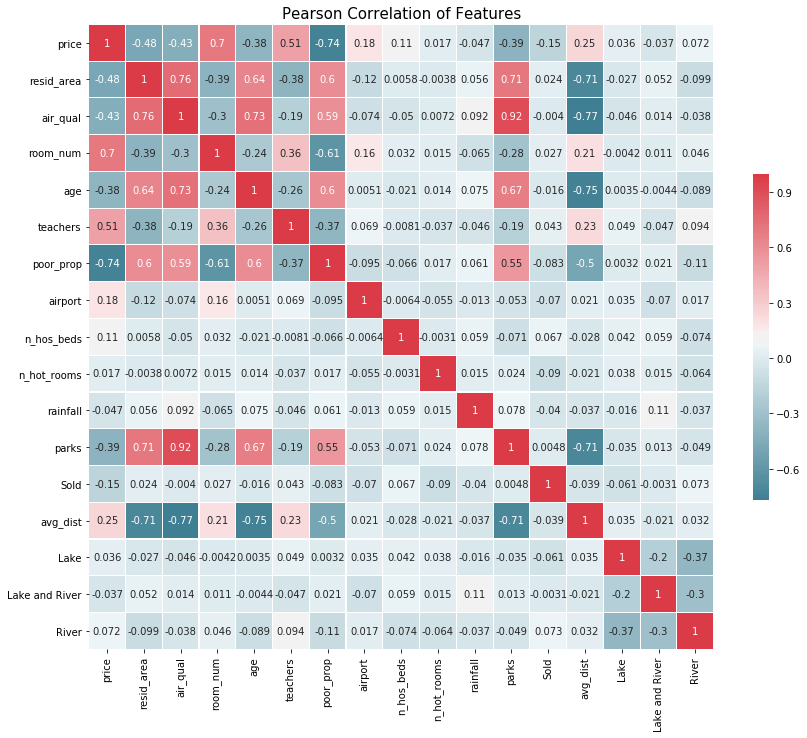

In [70]:
correlation_heatmap(house_df)

In [29]:
X = house_df.loc[:, house_df.columns != 'Sold']
y = house_df.loc[:, house_df.columns == 'Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

sc=StandardScaler()
sc.fit(X_train)

X_train_nor=sc.transform(X_train)
X_test_nor=sc.transform(X_test)

In [73]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train_nor, y_train)

print(logreg_clf.coef_)

[[-2.1696853   0.01438112 -0.76738724  0.66790233  0.00963947  0.47657827
  -1.25852667 -0.04955728  0.36533946 -0.17953347 -0.07001917  0.32060742
  -0.71368281 -0.04052592  0.01910116  0.16850899]]


/home/sysadmin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sysadmin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
print(logreg_clf.intercept_ )

[-0.24240195]


In [32]:
np.round(logreg_clf.predict_proba(X_test_nor),3)

array([[0.48 , 0.52 ],
       [0.996, 0.004],
       [0.426, 0.574],
       [0.292, 0.708],
       [0.591, 0.409],
       [0.384, 0.616],
       [0.472, 0.528],
       [0.497, 0.503],
       [0.287, 0.713],
       [0.304, 0.696],
       [0.216, 0.784],
       [0.416, 0.584],
       [0.356, 0.644],
       [0.88 , 0.12 ],
       [0.904, 0.096],
       [0.444, 0.556],
       [0.464, 0.536],
       [0.531, 0.469],
       [0.533, 0.467],
       [0.281, 0.719],
       [0.422, 0.578],
       [0.109, 0.891],
       [0.666, 0.334],
       [0.53 , 0.47 ],
       [0.273, 0.727],
       [0.909, 0.091],
       [0.599, 0.401],
       [0.685, 0.315],
       [0.645, 0.355],
       [0.211, 0.789],
       [0.603, 0.397],
       [0.827, 0.173],
       [0.388, 0.612],
       [0.468, 0.532],
       [0.151, 0.849],
       [0.483, 0.517],
       [0.276, 0.724],
       [0.997, 0.003],
       [0.141, 0.859],
       [0.422, 0.578],
       [0.388, 0.612],
       [0.537, 0.463],
       [0.165, 0.835],
       [0.4

In [71]:
cnf=confusion_matrix(y_test,logreg_clf.predict(X_test_nor))
print('Confusion Matrix: ',cnf)

Confusion Matrix:  [[35 23]
 [11 33]]
